In [1]:
import numpy as np
from nozzle import Spectral, Params, Nozzle, Boundary
import matplotlib.pyplot as plt
from tqdm import tqdm

# Dirichlet boundary

fixed_fixed
fixed_open


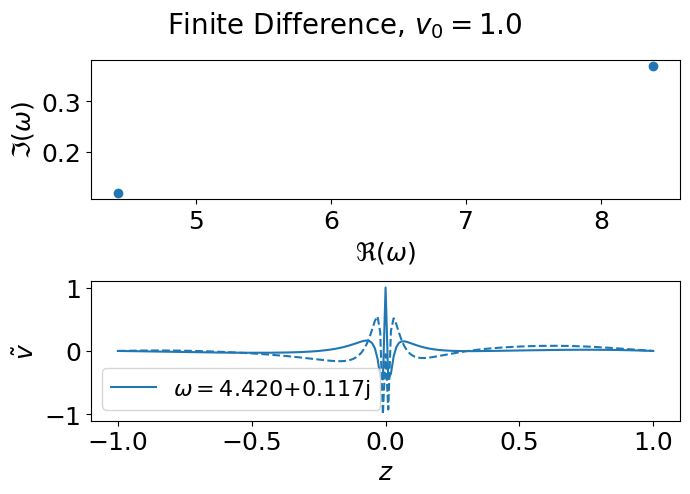

In [2]:
N = 201
Mm = 1.0
constant_v = False
accelerating = False

params = Params(Mm, constant_v=constant_v, accelerating=accelerating)
spectral = Spectral(N, "symmetric", "FD")
nozzle = Nozzle(params, spectral.x)
v0 = nozzle.v0
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2

A11 = np.zeros_like(D1)
A12 = np.eye(*D1.shape)
A21 = -np.diag(1-v0**2)@D2 \
        + np.diag((3*v0 + 1/v0)*(D1@v0))@D1 \
        + np.diag((1-1/v0**2)*(D1@v0)**2) \
        + np.diag((v0+1/v0)*(D2@v0))
A22 = -2j*(np.diag(v0)@D1 + np.diag(D1@v0))

A = np.block([[A11[1:-1,1:-1], A12[1:-1,1:-1]],[A21[1:-1,1:-1], A22[1:-1,1:-1]]])
nozzle.solve(A)
nozzle.sort_solutions(real_range=[0,10], imag_range=[-1,1])

fig, ax = plt.subplots(2,1, figsize=(7,5))
nozzle.plot_eigenvalues(ax=ax[0])
nozzle.plot_eigenfunctions(num_funcs=1,ax=ax[1])
fig.suptitle(f"Finite Difference, $v_0={Mm}$")
plt.tight_layout()

nozzle.save_data("FD")

# Open right end

In [ ]:
# open right end
Mm = 1
constant_v = False
accelerating = False
boundary = Boundary.FIXED_OPEN
params = Params(Mm, constant_v=constant_v, accelerating=accelerating, boundary=boundary)

fig, ax = plt.subplots(2,1,figsize=(7,10))
N_range = range(101,502,100)
for N in tqdm(N_range):
    spectral = Spectral(N, "symmetric", "FD", boundary=boundary)
    nozzle = Nozzle(params, spectral.x)
    v0 = nozzle.v0
    x = spectral.x
    D1 = spectral.D1
    D2 = spectral.D2

    A11 = np.zeros_like(D1)
    A12 = np.eye(*D1.shape)
    A21 = -np.diag(1-v0**2)@D2 \
            + np.diag((3*v0 + 1/v0)*(D1@v0))@D1 \
            + np.diag((1-1/v0**2)*(D1@v0)**2) \
            + np.diag((v0+1/v0)*(D2@v0))
    A22 = -2j*(np.diag(v0)@D1 + np.diag(D1@v0))

    # A = np.block([[A11, A12],[A21, A22]])
    A = np.block([[A11[1:,1:], A12[1:,1:]],[A21[1:,1:], A22[1:,1:]]])
    nozzle.solve(A)
    nozzle.sort_solutions(real_range=[0.1,50], imag_range=[-10,10])
    nozzle.plot_eigenvalues(ax=ax[0])
    nozzle.plot_eigenfunctions(num_funcs=1,ax=ax[1])
ax[0].legend([f"N={N}" for N in N_range])
ax[0].grid()
fig.suptitle(f"$v_0={Mm}$")

# fig, ax = plt.subplots(2,1, figsize=(7,5))
# nozzle.plot_eigenvalues(ax=ax[0])
# nozzle.plot_eigenfunctions(ax=ax[1])
# fig.suptitle(f"Finite Difference, $v_0={Mm}$")
# plt.tight_layout()

# nozzle.save_data("FD")

<AxesSubplot:xlabel='$z$', ylabel='$\\tilde{v}$'>

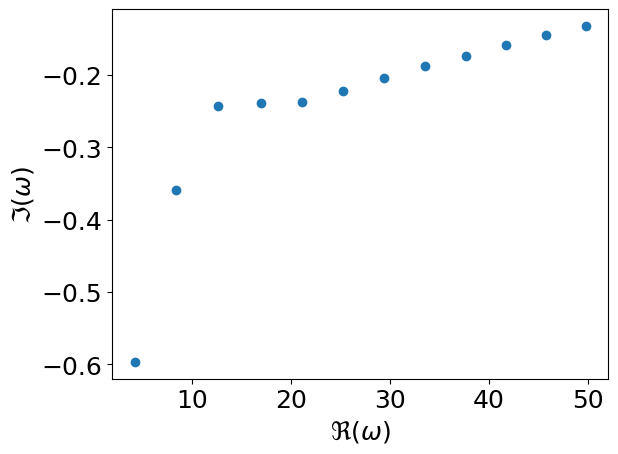

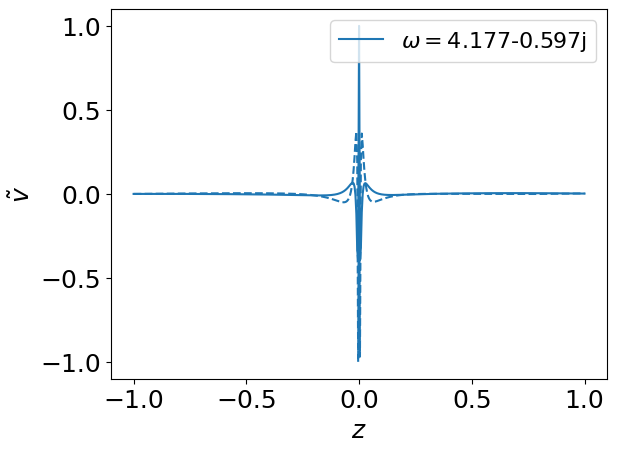

In [14]:
# open right end
Mm = 1
constant_v = False
accelerating = False
boundary = Boundary.FIXED_OPEN
N = 501

params = Params(Mm, constant_v=constant_v, accelerating=accelerating, boundary=boundary)

spectral = Spectral(N, "symmetric", "FD", boundary=boundary)
nozzle = Nozzle(params, spectral.x)
v0 = nozzle.v0
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2

A11 = np.zeros_like(D1)
A12 = np.eye(*D1.shape)
A21 = -np.diag(1-v0**2)@D2 \
        + np.diag((3*v0 + 1/v0)*(D1@v0))@D1 \
        + np.diag((1-1/v0**2)*(D1@v0)**2) \
        + np.diag((v0+1/v0)*(D2@v0))
A22 = -2j*(np.diag(v0)@D1 + np.diag(D1@v0))

# A = np.block([[A11, A12],[A21, A22]])
A = np.block([[A11[1:,1:], A12[1:,1:]],[A21[1:,1:], A22[1:,1:]]])
nozzle.solve(A)
nozzle.sort_solutions(real_range=[0.1,50], imag_range=[-5,5])
nozzle.plot_eigenvalues()
nozzle.plot_eigenfunctions(num_funcs=1)

# fig, ax = plt.subplots(2,1, figsize=(7,5))
# nozzle.plot_eigenvalues(ax=ax[0])
# nozzle.plot_eigenfunctions(ax=ax[1])
# fig.suptitle(f"Finite Difference, $v_0={Mm}$")
# plt.tight_layout()

# nozzle.save_data("FD")